In [2]:
# Importing necessary libraries
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('District_Statewise_Well.csv')
# Assuming 'target_column' is the name of your target variable
# Target column for prediction: 'Net Ground Water Availability for future use'
target_column = 'Net Ground Water Availability for future use'

In [4]:
data = data.drop(columns=['S.no.'], errors='ignore')

In [5]:
# Generate lag features for the past 3 months to create a time series structure
def create_lag_features(df, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    return df

In [6]:
# Encoding categorical columns like 'Name of State' and 'Name of District'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Name of State'] = label_encoder.fit_transform(data['Name of State'])
data['Name of District'] = label_encoder.fit_transform(data['Name of District'])

In [7]:
# Create lag features for the past 3 months
data = create_lag_features(data, target_column, 3)


In [8]:

# Drop rows with NaN values due to lag feature creation
data.dropna(inplace=True)
# Split features and target
X = data.drop(columns=[target_column])
y = data[target_column]
 #Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Split the data into training and testing sets
# Example: X = data.drop(columns=['target_column']), y = data['target_column']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

# 1. Support Vector Machine (SVM) with RBF kernel
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate all models using RMSE and R-squared score
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
r2_svm = r2_score(y_test, y_pred_svm)

# Output performance metrics
print("Support Vector Machine (SVM) Performance:")
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared (R2) Score:", r2_svm)


Support Vector Machine (SVM) Performance:
Root Mean Squared Error (RMSE): 34655.656134952376
R-squared (R2) Score: -0.09897261750645647


In [11]:

# 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Performance:")
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("R-squared (R2) Score:", r2_knn)



K-Nearest Neighbors (KNN) Performance:
Root Mean Squared Error (RMSE): 11078.925576353486
R-squared (R2) Score: 0.8876859960574566


In [12]:

# 3. Gradient Boosting Regressor (GBR)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor (GBR) Performance:")
print("Root Mean Squared Error (RMSE):", rmse_gbr)
print("R-squared (R2) Score:", r2_gbr)


Gradient Boosting Regressor (GBR) Performance:
Root Mean Squared Error (RMSE): 6780.941567519438
R-squared (R2) Score: 0.9579255329069539


In [13]:

# Output performance metrics
model_performance = {
    'SVM': {'RMSE': rmse_svm, 'R2': r2_svm},
    'KNN': {'RMSE': rmse_knn, 'R2': r2_knn},
    'Gradient Boosting': {'RMSE': rmse_gbr, 'R2': r2_gbr}
}

print("Model Performance:")
print(model_performance)


Model Performance:
{'SVM': {'RMSE': 34655.656134952376, 'R2': -0.09897261750645647}, 'KNN': {'RMSE': 11078.925576353486, 'R2': 0.8876859960574566}, 'Gradient Boosting': {'RMSE': 6780.941567519438, 'R2': 0.9579255329069539}}


In [14]:
model_performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Print the DataFrame
print("Model Performance:")
print(model_performance_df)

Model Performance:
                           RMSE        R2
SVM                34655.656135 -0.098973
KNN                11078.925576  0.887686
Gradient Boosting   6780.941568  0.957926


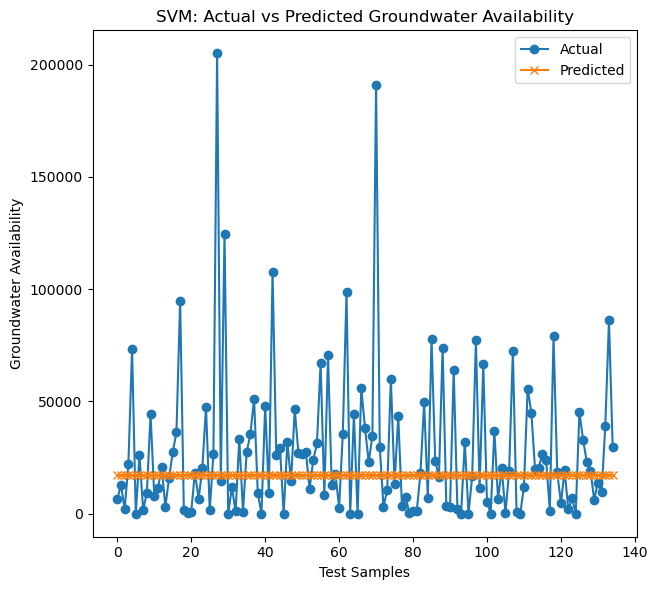

In [15]:

# Plot actual vs predicted for all models
plt.figure(figsize=(18, 6))

# SVM
plt.subplot(1, 3, 1)
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_svm, label="Predicted", marker='x')
plt.legend()
plt.title("SVM: Actual vs Predicted Groundwater Availability")
plt.xlabel("Test Samples")
plt.ylabel("Groundwater Availability")
plt.tight_layout()
plt.show()


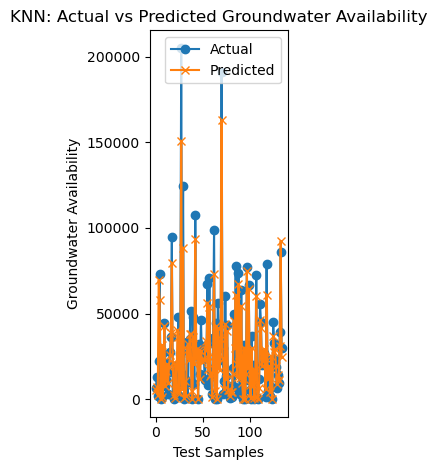

In [16]:

# KNN
plt.subplot(1, 3, 2)
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_knn, label="Predicted", marker='x')
plt.legend()
plt.title("KNN: Actual vs Predicted Groundwater Availability")
plt.xlabel("Test Samples")
plt.ylabel("Groundwater Availability")
plt.tight_layout()
plt.show()

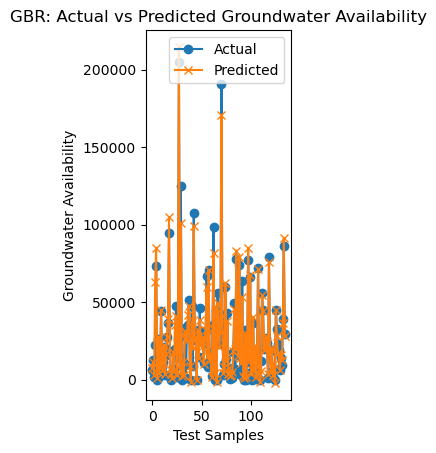

In [17]:
# Gradient Boosting
plt.subplot(1, 3, 3)
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_gbr, label="Predicted", marker='x')
plt.legend()
plt.title("GBR: Actual vs Predicted Groundwater Availability")
plt.xlabel("Test Samples")
plt.ylabel("Groundwater Availability")

plt.show()
